In [1]:
import pandas as pd
import numpy as np
import itertools
import statsmodels.api as sm
import pmdarima as pm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as md
import os
import sys

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

from sklearn.metrics import mean_absolute_error, mean_squared_error

from utils.metrics import predicted_revenue

import warnings

In [3]:
from utils.tools import autoimport

from data.data_loader import Dataset_ARIMA
# autoimport('Dataset_ARIMA')

c:\Users\cle\AppData\Local\miniforge3\envs\test\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
try:
    del sys.modules['Dataset_ARIMA']
    print('deleted')
except KeyError:
    pass

In [181]:
train = Dataset_ARIMA(data_path='SRL_NEG_08_12.csv', flag='train', scale=None)
test = Dataset_ARIMA(data_path='SRL_NEG_08_12.csv', flag='test', scale=None)

In [143]:
perc = 0.95

In [180]:
print(train.data[train.data > np.quantile(train.data, perc)])
train.data[train.data > np.quantile(train.data, perc)] = np.quantile(train.data, perc)

[1074.    241.76  280.76  400.    337.13  265.    297.05  179.44  249.23
  231.29  197.02 3087.    301.79  429.    688.    183.33  180.9   604.
  338.56  497.    860.3   460.09  335.92  222.    189.11  633.33  542.3
  440.    340.    220.04  445.85  188.  ]


In [162]:
integrated = False

In [179]:
adfuller(train.data)[1] < 0.1

True

In [178]:
if adfuller(train.data)[1] < 0.1: 
    # print(adfuller(train.data)[1] > 0.1)
    integrated = True
else: integrated = False

print(integrated)

True


In [129]:
if integrated:
    train.data = np.diff(train.data)

Text(0, 0.5, 'Value')

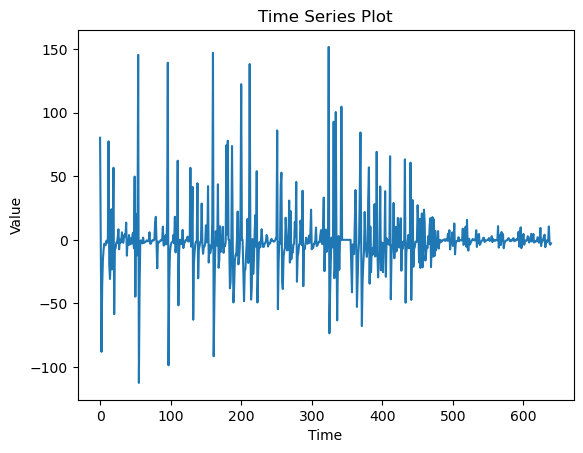

In [130]:
# Create a figure and axis
fig, ax = plt.subplots()

# Create an array with the number of data points for the x-axis
x = np.array(range(len(train.data)))

# Plot the time series
ax.plot(x, train.data)

# Add title and labels
ax.set_title("Time Series Plot")
ax.set_xlabel("Time")
ax.set_ylabel("Value")

Text(0, 0.5, 'Value')

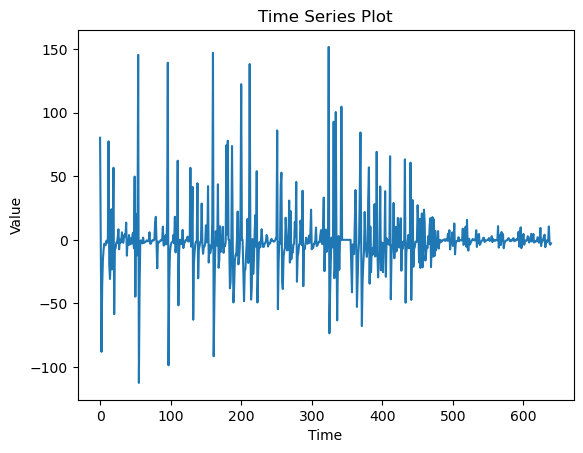

In [115]:
# Create a figure and axis
fig, ax = plt.subplots()

# Create an array with the number of data points for the x-axis
x = np.array(range(len(train.data)))

# Plot the time series
ax.plot(x, train.data)

# Add title and labels
ax.set_title("Time Series Plot")
ax.set_xlabel("Time")
ax.set_ylabel("Value")

In [131]:
from pmdarima import auto_arima

# Assume 'time_series' is a numpy array containing your time series data
model = auto_arima(train.data, 
                   start_p=1, 
                   start_q=1, 
                   max_p=9, 
                   max_q=9, 
                   max_order=20,
                   seasonal=False, 
                   d=0, 
                   trace=True, 
                   error_action='ignore', 
                   suppress_warnings=False, 
                   stepwise=False)

model.fit(train.data)

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5955.928, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5940.494, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=5885.625, Time=0.05 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=5875.047, Time=0.08 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=5868.466, Time=0.15 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=5869.870, Time=0.28 sec
 ARIMA(0,0,6)(0,0,0)[0]             : AIC=5871.848, Time=0.29 sec
 ARIMA(0,0,7)(0,0,0)[0]             : AIC=5858.018, Time=0.26 sec
 ARIMA(0,0,8)(0,0,0)[0]             : AIC=5859.976, Time=0.33 sec
 ARIMA(0,0,9)(0,0,0)[0]             : AIC=5857.353, Time=0.32 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=5947.850, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=5873.856, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=5869.571, Time=0.11 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=5871.571, Time=0.18 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=5870.047, Time=0.21 sec
 ARIMA(1,0

ARIMA(order=(8, 0, 2), scoring_args={}, with_intercept=False)

In [132]:
model.fit(train.data)

ARIMA(order=(8, 0, 2), scoring_args={}, with_intercept=False)

In [118]:
test.data

array([38.86, 26.83, 25.49, 22.58, 48.84, 34.24, 41.84, 38.93, 60.74,
       50.16, 36.68, 34.67, 33.64, 36.  , 33.24, 53.5 , 48.91, 29.71,
       21.51, 27.01, 32.52, 21.65, 40.74, 32.49, 36.  , 29.4 , 42.5 ,
       30.86, 23.27, 16.44, 50.  , 22.4 , 16.15, 17.32, 14.4 , 11.84,
        9.85,  8.38, 10.96,  7.03,  6.79, 37.75, 24.03, 27.95, 32.62,
       23.49, 15.04, 12.76, 10.22,  8.15,  6.51,  9.22,  7.48, 26.96,
       11.8 ,  9.  ,  7.11,  5.67,  6.09,  7.66, 18.46, 11.5 , 14.11,
       17.16,  8.53,  6.33,  5.46, 14.16,  9.03,  6.48,  4.75,  3.65,
        2.94,  2.3 ,  7.75,  6.62,  5.5 , 12.  ,  6.66,  4.88,  4.5 ,
        9.6 ,  5.78, 32.15, 22.33, 11.13,  9.81, 23.36,  9.12,  7.67,
        6.32,  4.97, 10.46, 16.48, 12.83, 22.42, 16.68, 11.7 ,  8.6 ,
        6.56,  8.75,  7.26,  8.83,  8.58,  6.59,  5.4 ,  3.99,  3.13,
        3.12,  2.53,  2.2 ,  2.91, 18.21, 12.51, 12.84,  6.49,  5.82,
        4.45,  4.58,  5.  ,  4.51,  3.84,  3.33,  2.85,  2.64,  2.49,
        2.05,  4.6 ,

In [133]:
pred = model.predict(len(test.data))

In [105]:
predicted_revenue(pred=pred, true=test.data)

375.58

In [137]:
pred = model.predict(len(test.data))

if integrated:
    pred = np.insert(pred, 0, train.data[-1])
    pred = np.cumsum(pred)

In [48]:
np.concatenate((np.array(train.data[-1]), pred))

ValueError: zero-dimensional arrays cannot be concatenated

In [59]:
pred = np.insert(pred, 0, train[-1])

In [62]:
pred = pred.cumsum()

In [76]:
predicted_revenue(pred=pred, true = test.data)

653.98

ValueError: x and y must have same first dimension, but have shapes (139,) and (140,)

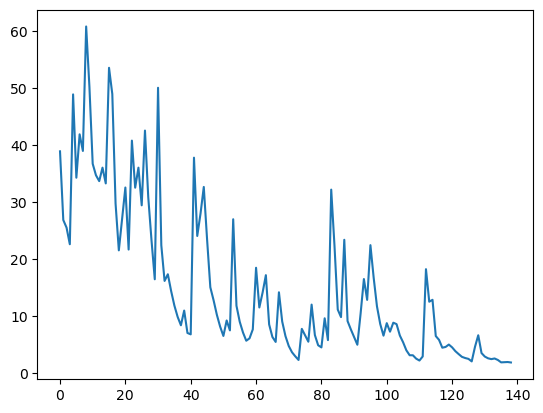

In [138]:
# Create a figure and axis
fig, ax = plt.subplots()

# Create an array with the number of data points for the x-axis
x = np.array(range(len(test.data)))

# Plot the time series
ax.plot(x, test.data, label='True')
ax.plot(x, pred, label='Pred')


# Add title and labels
ax.set_title("Time Series Plot")
ax.set_xlabel("Time")
ax.set_ylabel("Value")

In [52]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
import sys
import os

from data.data_loader import Dataset_ARIMA

In [24]:
data_path = 'SRL_POS_04_08.csv'


[1103.5   160.52  615.06 6350.    244.52  435.    292.    161.33  890.42
  207.22  243.36 1511.12  541.    325.72  275.81  184.23  170.92  300.
  192.71  967.71  274.54 4945.46 1198.48  572.32  339.56  217.    236.24
  170.    408.16  238.4   193.    157.51]


[ 389.    211.18  214.61  446.67  272.44  200.    200.   3382.    256.41
  256.76  688.92  237.    220.51  260.    320.    861.   1500.    586.2
  412.47  290.12  238.94  971.25  787.5   645.83  441.14  290.    244.
  216.92  227.05  320.    377.    260.  ]
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6593.544, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(0,1,6)(0,0,0)[0] intercept   : AIC=inf, Time=0.94 sec
 ARIMA(0,1,7)(0,0,0)[0] intercept   : AIC=inf, Time=1.11 sec
 ARIMA(0,1,8)(0,0,0)[0] intercept   : AIC=inf, Time=1.37 sec
 ARIMA(0,1,9)(0,0,0)[0] intercept   : AIC=inf, Time=2.31 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6409.761, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec


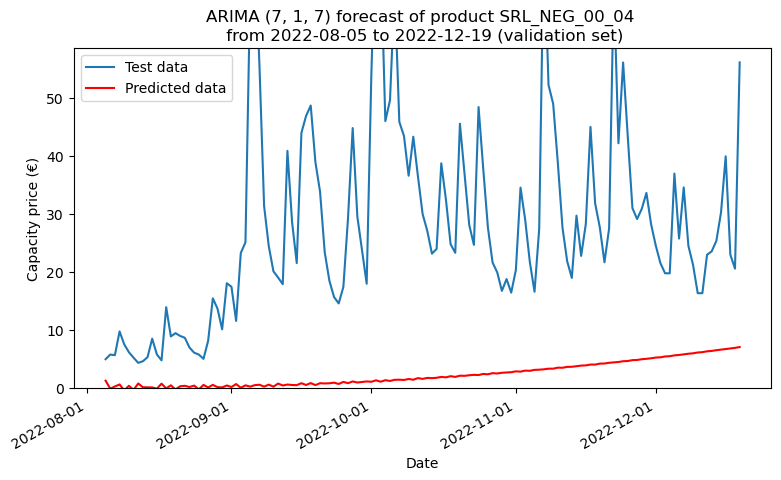

[1074.    241.76  280.76  400.    337.13  265.    297.05  179.44  249.23
  231.29  197.02 3087.    301.79  429.    688.    183.33  180.9   604.
  338.56  497.    860.3   460.09  335.92  222.    189.11  633.33  542.3
  440.    340.    220.04  445.85  188.  ]
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6462.817, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(0,1,6)(0,0,0)[0] intercept   : AIC=inf, Time=0.82 sec
 ARIMA(0,1,7)(0,0,0)[0] intercept   : AIC=inf, Time=0.98 sec
 ARIMA(0,1,8)(0,0,0)[0] intercept   : AIC=inf, Time=1.09 sec
 ARIMA(0,1,9)(0,0,0)[0] intercept   : AIC=inf, Time=1.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6302.220, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec


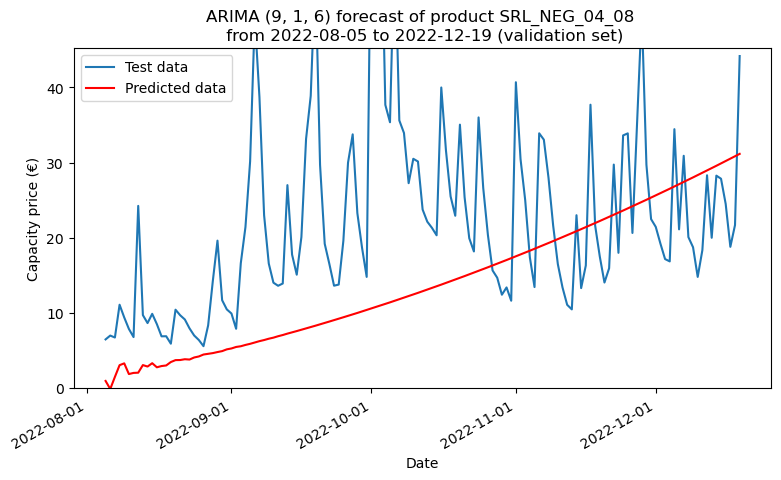

[ 380.    430.    500.    219.28  455.    218.    237.24  442.71  370.
  288.   1697.28  186.38  262.    299.    215.55 1625.    731.6   281.84
 7258.    467.26  305.82  500.    594.91  357.    260.34  177.6   358.57
  317.39  249.3   180.25  274.    325.  ]
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6742.352, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(0,1,6)(0,0,0)[0] intercept   : AIC=inf, Time=0.82 sec
 ARIMA(0,1,7)(0,0,0)[0] intercept   : AIC=inf, Time=1.35 sec
 ARIMA(0,1,8)(0,0,0)[0] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(0,1,9)(0,0,0)[0] intercept   : AIC=inf, Time=1.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6512.367, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec

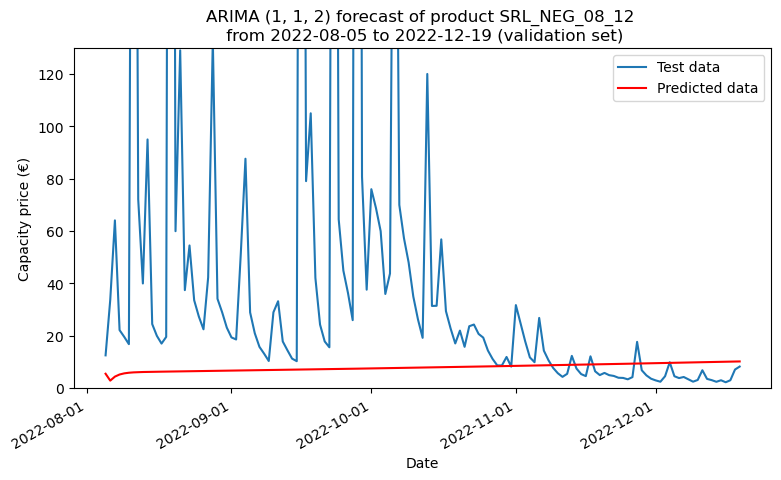

[ 341.66  789.09 4714.26  845.    456.    911.16  431.12  683.08  671.67
  556.5   395.12 2600.    430.    394.    347.    367.52  445.   1000.
  360.5   345.6   626.67  827.78 4140.    942.2   538.2   408.    680.25
  672.5   562.7   389.72  354.13  648.4 ]
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7550.343, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=1.32 sec
 ARIMA(0,1,6)(0,0,0)[0] intercept   : AIC=inf, Time=1.20 sec
 ARIMA(0,1,7)(0,0,0)[0] intercept   : AIC=inf, Time=1.38 sec
 ARIMA(0,1,8)(0,0,0)[0] intercept   : AIC=inf, Time=1.05 sec
 ARIMA(0,1,9)(0,0,0)[0] intercept   : AIC=inf, Time=1.72 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7356.226, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec

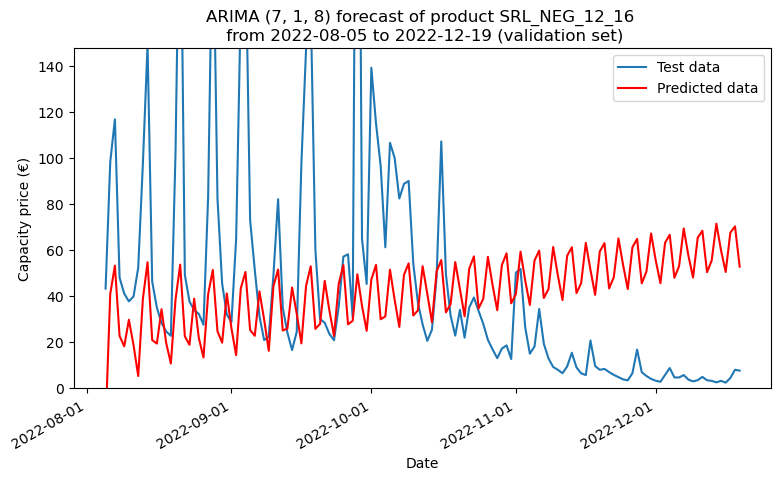

[ 130.    226.32 4742.84  795.    410.    193.46  129.62  426.15  322.2
  177.76  312.    300.    222.    188.    154.5   172.8   167.31  155.08
  192.96  337.75  206.93  190.3   130.    150.   1333.34  440.    227.
  165.16  350.    289.32  229.    164.28]
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6583.322, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=6094.351, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=5896.616, Time=0.08 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=5796.380, Time=0.14 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=5715.794, Time=0.22 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=5700.166, Time=0.23 sec
 ARIMA(0,0,6)(0,0,0)[0]             : AIC=5688.836, Time=0.23 sec
 ARIMA(0,0,7)(0,0,0)[0]             : AIC=5683.007, Time=0.40 sec
 ARIMA(0,0,8)(0,0,0)[0]             : AIC=5659.995, Time=0.40 sec
 ARIMA(0,0,9)(0,0,0)[0]             : AIC=5651.712, Time=0.52 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=5608.031, Time=0.03 sec
 ARIMA(1,0,1)(0,

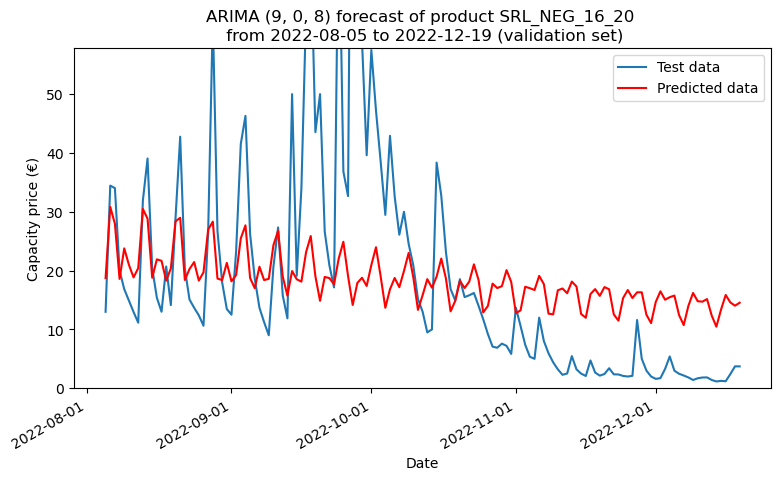

[ 118.    104.61  551.43  361.83  175.    102.92  232.56  146.16  101.48
  129.5   106.78  132.5   175.4   180.02  348.    742.    378.56  660.
  400.    253.6   170.57  128.6  2738.12  884.62  690.4   474.11  287.64
  187.72  113.86  190.6   116.33  139.25]
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5538.274, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(0,1,6)(0,0,0)[0] intercept   : AIC=inf, Time=1.32 sec
 ARIMA(0,1,7)(0,0,0)[0] intercept   : AIC=inf, Time=1.46 sec
 ARIMA(0,1,8)(0,0,0)[0] intercept   : AIC=inf, Time=1.76 sec
 ARIMA(0,1,9)(0,0,0)[0] intercept   : AIC=inf, Time=1.67 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5419.157, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec

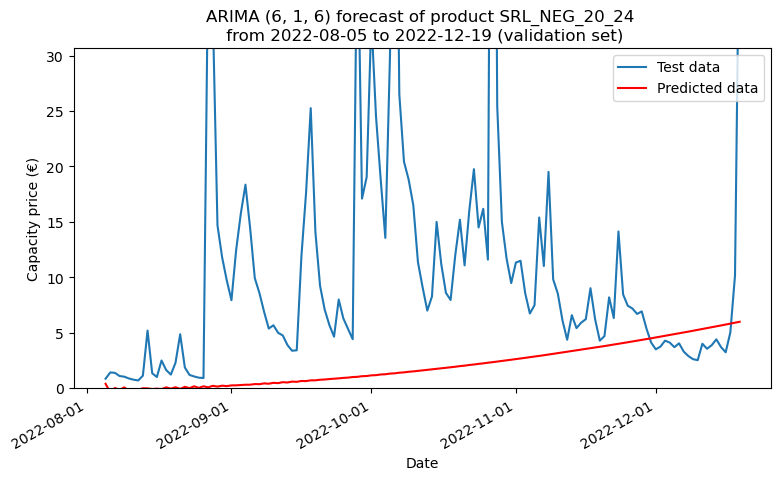

[ 838.    379.8   150.    136.36 1200.    120.02  160.71 1000.    240.9
  199.    239.    131.56  119.    123.69  139.    142.31  128.    251.57
 1454.55  116.36  257.46 6543.    924.64  424.6   271.49  180.5   146.11
  324.75  182.28  141.95  118.57  111.2 ]
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6065.152, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.87 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=1.13 sec
 ARIMA(0,1,6)(0,0,0)[0] intercept   : AIC=inf, Time=1.29 sec
 ARIMA(0,1,7)(0,0,0)[0] intercept   : AIC=inf, Time=1.36 sec
 ARIMA(0,1,8)(0,0,0)[0] intercept   : AIC=inf, Time=1.67 sec
 ARIMA(0,1,9)(0,0,0)[0] intercept   : AIC=inf, Time=1.99 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5903.490, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 se

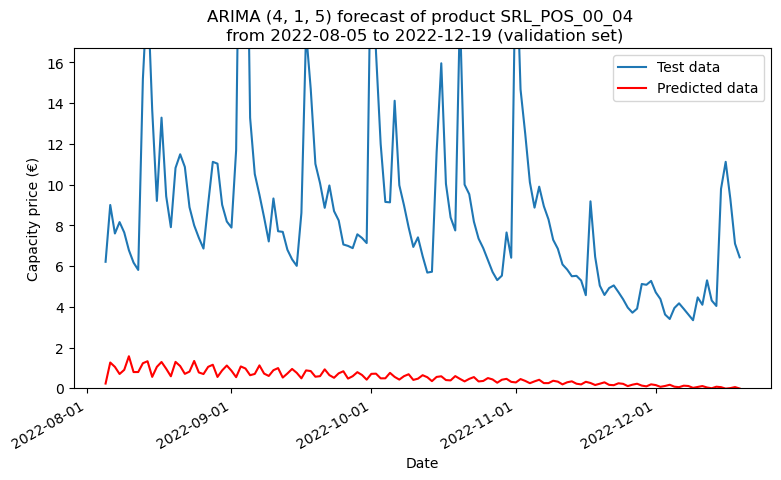

[1103.5   160.52  615.06 6350.    244.52  435.    292.    161.33  890.42
  207.22  243.36 1511.12  541.    325.72  275.81  184.23  170.92  300.
  192.71  967.71  274.54 4945.46 1198.48  572.32  339.56  217.    236.24
  170.    408.16  238.4   193.    157.51]
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6546.188, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.87 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(0,1,6)(0,0,0)[0] intercept   : AIC=inf, Time=1.13 sec
 ARIMA(0,1,7)(0,0,0)[0] intercept   : AIC=inf, Time=1.55 sec
 ARIMA(0,1,8)(0,0,0)[0] intercept   : AIC=inf, Time=1.12 sec
 ARIMA(0,1,9)(0,0,0)[0] intercept   : AIC=inf, Time=1.91 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6376.965, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec

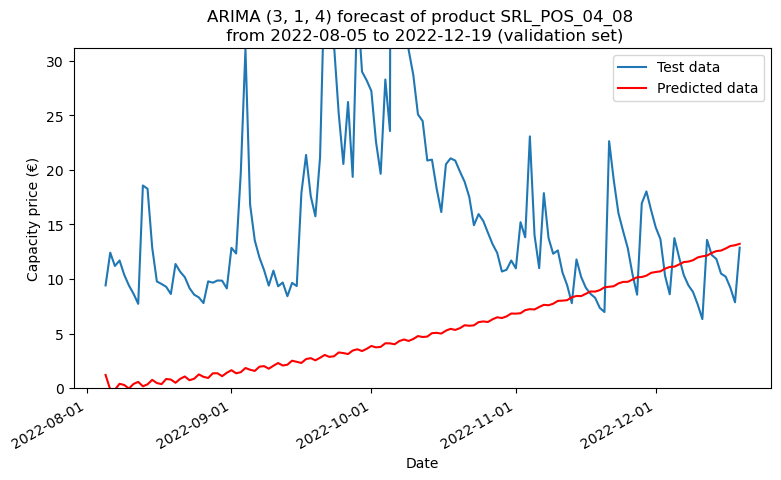

[ 189.84  449.85 1687.    350.    532.    444.    215.    681.25  332.67
  166.    218.72  165.44  320.   1518.99  219.    875.59  370.46  722.85
  352.08 6733.36 1453.32  641.92  366.41  233.5   290.    212.71  172.39
  170.1   166.19  257.16  206.92  318.56]
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6399.025, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.82 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(0,1,6)(0,0,0)[0] intercept   : AIC=inf, Time=1.13 sec
 ARIMA(0,1,7)(0,0,0)[0] intercept   : AIC=inf, Time=1.45 sec
 ARIMA(0,1,8)(0,0,0)[0] intercept   : AIC=inf, Time=1.75 sec
 ARIMA(0,1,9)(0,0,0)[0] intercept   : AIC=inf, Time=1.70 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6231.251, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 s

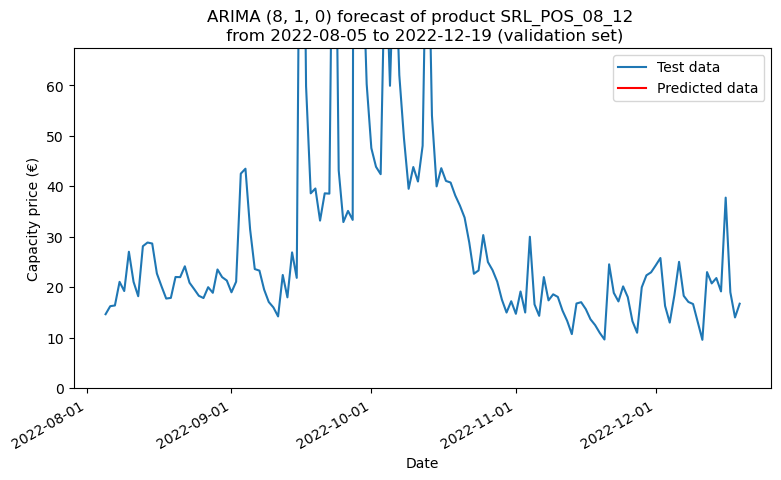

[1411.    223.34  169.99  245.    667.5   789.    380.    236.38  180.76
  189.74  196.16  158.72  457.15  314.08  183.64 1299.    214.29  300.
  630.36  282.2   927.71  300.   6543.    731.42  444.85  266.    173.2
  238.05  162.6   236.84 1766.68  407.89]
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6547.956, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.94 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=1.04 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(0,1,6)(0,0,0)[0] intercept   : AIC=inf, Time=1.15 sec
 ARIMA(0,1,7)(0,0,0)[0] intercept   : AIC=inf, Time=1.54 sec
 ARIMA(0,1,8)(0,0,0)[0] intercept   : AIC=inf, Time=1.59 sec
 ARIMA(0,1,9)(0,0,0)[0] intercept   : AIC=inf, Time=2.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6376.283, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec


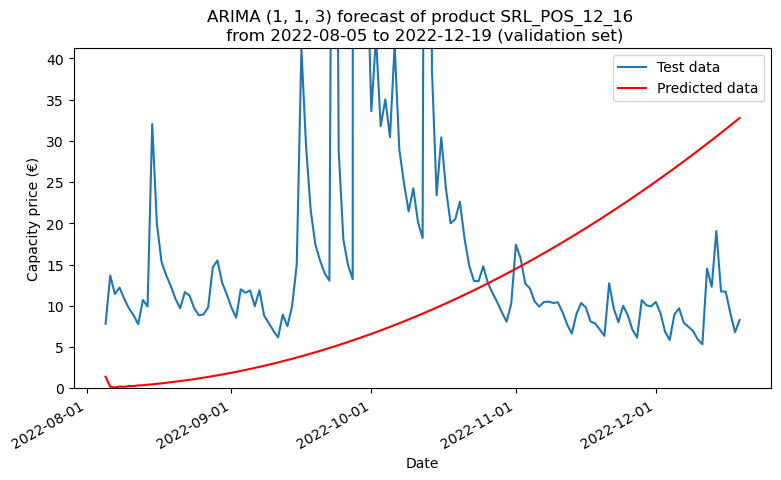

[ 210.    195.    576.29  477.    462.    350.    227.02  190.64  199.34
  200.    298.58  545.    866.95  420.46  195.9  2855.56  783.79  444.12
  282.96  200.    267.92  190.83  185.    254.87  201.44  188.09  217.
  189.    298.88  320.    227.77  201.84]
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6502.221, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.85 sec
 ARIMA(0,1,6)(0,0,0)[0] intercept   : AIC=inf, Time=1.12 sec
 ARIMA(0,1,7)(0,0,0)[0] intercept   : AIC=inf, Time=1.43 sec
 ARIMA(0,1,8)(0,0,0)[0] intercept   : AIC=inf, Time=1.60 sec
 ARIMA(0,1,9)(0,0,0)[0] intercept   : AIC=inf, Time=1.85 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6342.927, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec

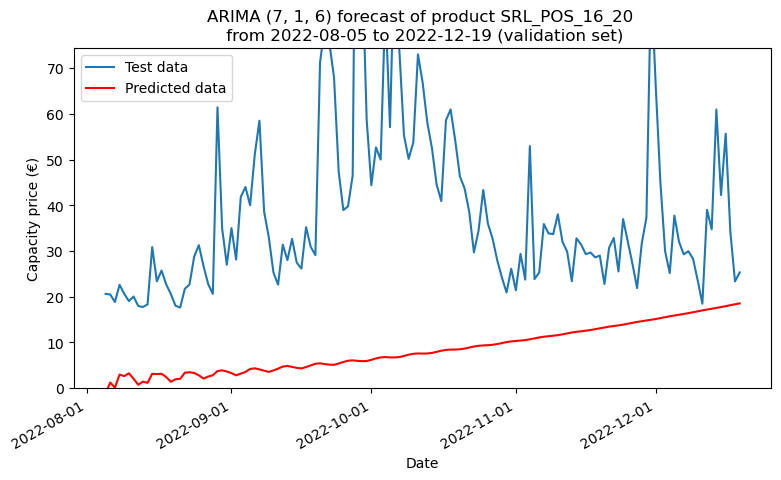

[ 116.25  154.16  123.34 1099.59  244.    107.64  120.    488.    143.
  108.84  120.    136.41  126.41   99.24  127.64  292.    135.32 4825.
  629.    354.48  224.41  160.18  141.6   113.64  173.64  152.99  123.4
  149.    120.68  132.33  101.96  123.39]
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5772.423, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.99 sec
 ARIMA(0,1,6)(0,0,0)[0] intercept   : AIC=inf, Time=1.22 sec
 ARIMA(0,1,7)(0,0,0)[0] intercept   : AIC=inf, Time=1.59 sec
 ARIMA(0,1,8)(0,0,0)[0] intercept   : AIC=inf, Time=1.68 sec
 ARIMA(0,1,9)(0,0,0)[0] intercept   : AIC=inf, Time=1.91 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5581.892, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 A

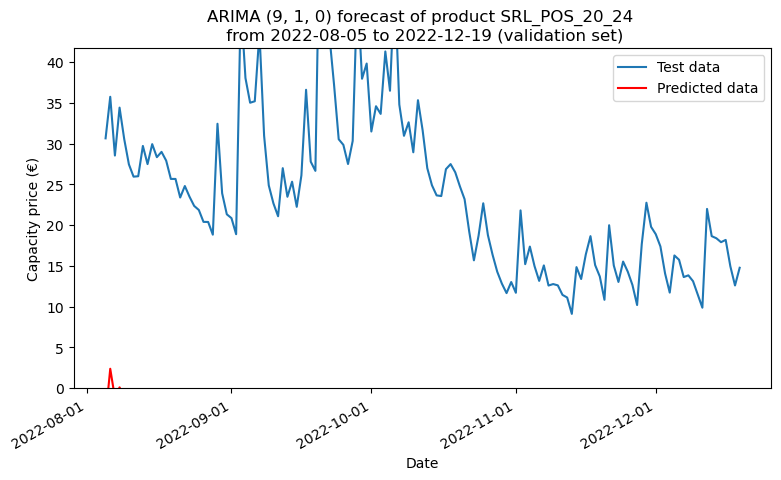

In [60]:
data_paths = [x for x in os.listdir('data/processed/srl') if 'csv' in x]

for data_path in data_paths:
    arima_pipeline(data_path)

In [59]:
def arima_pipeline(data_path):

    # Assume train_data and test_data are your input numpy arrays
    train_data = Dataset_ARIMA(data_path=data_path, flag='train', scale=None).data
    test_data = Dataset_ARIMA(data_path=data_path, flag='val', scale=None).data

    test_dates = Dataset_ARIMA(data_path=data_path, flag='val', scale=None).date
    test_dates = np.array(test_dates, dtype='datetime64')

    perc=0.95
    perc_value = np.quantile(train_data, perc)

    print(train_data[train_data > np.quantile(train_data, perc)])
    train_data[train_data > np.quantile(train_data, perc)] = perc_value
    
    def check_stationarity(series):
        result = adfuller(series)
        return result[1] <= 0.05  # Returns True if series is stationary

    d = 0  # Order of differencing
    temp_train_data = train_data.copy()

    while not check_stationarity(temp_train_data):
        temp_train_data = np.diff(temp_train_data)
        d += 1
        
    model = auto_arima(temp_train_data, 
                    start_p=1, 
                    start_q=1, 
                    max_p=9, 
                    max_q=9, 
                    d=d, 
                    max_order=20,
                    seasonal=False, 
                    trace=True, 
                    error_action='ignore', 
                    suppress_warnings=True, 
                    stepwise=False)

    model.fit(temp_train_data)
    
    forecast = model.predict(n_periods=len(test_data))

    def undifference(data, order):
        for i in range(order):
            data = np.r_[data[0], np.cumsum(data[1:])]
        return data

    if d > 0:
        forecast = undifference(forecast, d)

    mse = mean_squared_error(test_data, forecast)
    print('Test MSE: %.3f' % mse)
    
    
    # plot
    import matplotlib.dates as mdates

    # Prepare the figure
    fig, ax = plt.subplots(figsize=(9,5))

    # Plot the test data
    ax.plot(test_dates, test_data, label='Test data')

    # Plot the forecast
    ax.plot(test_dates, forecast, color='red', label='Predicted data')

    # Format the x-axis to only show the first day of each month
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    # Set the y-axis limits
    ax.set_ylim([0, np.percentile(test_data, 95)])

    # Rotate the date labels to avoid overlap
    fig.autofmt_xdate()

    data_name = data_path.split('.')[0]

    # Add title and labels
    ax.set_title(f"ARIMA {model.get_params()['order']} forecast of product {data_name} \n from {test_dates[0]} to {test_dates[-1]} (validation set)")
    ax.set_xlabel("Date")
    ax.set_ylabel("Capacity price (€)")

    # Add the legend
    ax.legend()

    # Show the plot
    plt.show()

    fig.savefig(f'ARIMA_{data_name}.jpg', bbox_inches='tight')